In [14]:
from vtl.Readfile import Readfile
from spec_id import Analyze_Stack_avgage, Stack_spec_normwmean,Stack_model_normwmean, Likelihood_contours,\
    Error,Oldest_galaxy,Gauss_dist,Make_model_list, Scale_model, Galaxy_ids, Galaxy, Combine_1D_parameters,Stack
from astropy.table import Table
from astropy.io import fits
from scipy.interpolate import interp1d
from scipy.ndimage import interpolation
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
gids=Galaxy_ids('masslist_mar22.dat')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)

tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

#UVJ plot

data

In [4]:
uvjDB = pd.read_pickle('uvj_db.pkl')

plot

In [53]:
%matplotlib inline


plt.figure(figsize=[10,10])
plt.plot(uvjDB['(V-J)'],uvjDB['(U-V)'],'o',color='#127794', alpha=.5,ms=3, label = 'Star Forming')
plt.plot(uvjDB['(V-J)'][uvjDB['Q/S'] == 'q'],uvjDB['(U-V)'][uvjDB['Q/S'] == 'q'],'o',color='#E81524', alpha=.5,ms=3, label = 'Quiscent')
plt.plot(uvjDB['(V-J)'][uvjDB['IN_SAMP'] == True],uvjDB['(U-V)'][uvjDB['IN_SAMP'] == True],'d',color='#93000B',ms=10, label = 'Selected Sample')
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.045,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2,fontsize=23)
plt.xlabel('(V-J)',fontsize=30)
plt.ylabel('(U-V)',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
# plt.show()
plt.savefig('../important_plots/uvj_plot.png')
plt.close()

#Example Spectra and Best Fit

data

In [6]:
spec = Galaxy('s39170')
spec.Get_best_fit('chidat/s39170_apr6_galfit_cont_chidata.fits','chidat/s39170_apr6_galfit_feat_chidata.fits',metal,age,tau,1.023)

plot

In [40]:
%matplotlib inline

sea.set_style( {"xtick.major.size": 8, "ytick.major.size": 8,
                "xtick.minor.size": 5, "ytick.minor.size": 5})
plt.figure(figsize=(15,7))
plt.errorbar(spec.wv/(1 + spec.specz),spec.fl*1E18,spec.er*1E18,fmt='o',color='#2e4473',ms=5,label = 'Galaxy Spectra')
plt.plot(spec.wv/(1 + spec.specz),spec.mfl*1E18, color='#81161B',
         label='Best fit\nZ/Z$_\odot$=%s,\nt=%s Gyrs' % (np.round(spec.bfmetal/0.019,2),spec.bfage))
plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)
plt.text(3900,5.6,'Ca HK',fontsize=25)
plt.text(4080,5.6,'H$\delta$',fontsize=25)
plt.text(4280,5.6,'G+H$\gamma$',fontsize=25)
plt.text(4830,5.6,'H$\\beta$',fontsize=25)
plt.text(5160,5.6,'Mgb',fontsize=25)
plt.xlim(3900,5600)
plt.ylim(0,5.5)
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=35)
plt.xlabel('Restframe Wavelength ($\AA$)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.gcf().subplots_adjust(bottom=0.235)
plt.legend(loc=4,fontsize=25)
plt.minorticks_on()
# plt.show()
plt.savefig('../important_plots/s39170_spec.png')
plt.close()

#Age Vs Redshift - 3 feat groups

Data

In [ ]:
"""DATA"""

lzS=Stack(gids.speclist_lz,gids.rshift_lz,np.arange(3250,5350,10))
lzS.Stack_normwmean()
lzS.Highest_likelihood_model_mlist(gids.ids_lz,0.021,4.0,tau)
lzS.Stack_normwmean_model(lzS.mlist)

In [89]:
"""PLOT"""
def Plot_stack(wv,fl,er,mwv,mfl,bfm,bfa,adist,mdist,window=[],save_plot=False,plot_name=''):
    fig = plt.figure(figsize=[15,8])
    plt.errorbar(wv,fl * 1000,er * 1000,color='#2e4473',fmt='o')
    plt.plot(mwv,mfl * 1000,color='#81161B',label='Z=%s Z$_\odot$,t=%s' % (np.round(bfm/0.019,2),bfa))
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvline(4862.68,linestyle='--', alpha=.3)
    plt.axvline(5176.7,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    plt.axvspan(5120, 5240, color='k', alpha=.1)
    plt.text(3900,window[3]+.1,'Ca HK',fontsize=25)
    plt.text(4080,window[3]+.1,'H$\delta$',fontsize=25)
    plt.text(4280,window[3]+.1,'G+H$\gamma$',fontsize=25)
    plt.text(4830,window[3]+.1,'H$\\beta$',fontsize=25)
    plt.text(5160,window[3]+.1,'Mgb',fontsize=25)
    
    plt.axis(window)
    plt.ylabel('F$_\lambda$',size=30)
    plt.xlabel('Restframe Wavelength ($\AA$)',size=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=1,fontsize=20)
    plt.minorticks_on()
        
    inset_axes(fig.add_subplot(111),width="50%", height=1.0, loc=2)
    plt.plot(age,adist)
    plt.xticks([])
    plt.yticks([])
    
    inset_axes(fig.add_subplot(111),width="50%", height=1.0, loc=4)
    plt.plot(metal,mdist)
    plt.xticks([])
    plt.yticks([])
    
    if save_plot == True:
        plt.savefig(plot_name)
    else:
        plt.show()
    plt.close()
    
def Plot_stack2(wv,fl,er,mwv,mfl,bfm,bfa,adist,mdist,window=[],save_plot=False,plot_name=''):
    gs = gridspec.GridSpec(2,2,height_ratios=[1,3],wspace=0)
    plt.figure(figsize=[15,8])
    plt.subplot(gs[1,:])
    plt.errorbar(wv,fl * 1000,er * 1000,color='#2e4473',fmt='o')
    plt.plot(mwv,mfl * 1000,color='#81161B',label='Z=%s Z$_\odot$,t=%s' % (np.round(bfm/0.019,2),bfa))
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvline(4862.68,linestyle='--', alpha=.3)
    plt.axvline(5176.7,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    plt.axvspan(5120, 5240, color='k', alpha=.1)
    plt.text(3900,window[3]+.1,'Ca HK',fontsize=25)
    plt.text(4080,window[3]+.1,'H$\delta$',fontsize=25)
    plt.text(4280,window[3]+.1,'G+H$\gamma$',fontsize=25)
    plt.text(4830,window[3]+.1,'H$\\beta$',fontsize=25)
    plt.text(5160,window[3]+.1,'Mgb',fontsize=25)
    plt.axis(window)
    plt.ylabel('F$_\lambda$',size=30)
    plt.xlabel('Restframe Wavelength ($\AA$)',size=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=4,fontsize=20)
    plt.minorticks_on()
        
    ax1 = plt.subplot(gs[0,0])
    plt.plot(age,adist)
    plt.yticks([])
    ax1.xaxis.tick_top()
    
    ax2 = plt.subplot(gs[0,1])
    plt.plot(metal,mdist)
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.yticks([])
    ax2.xaxis.tick_top()
    
    if save_plot == True:
        plt.savefig(plot_name)
    else:
        plt.show()
    plt.close()

In [50]:
%matplotlib inline

z=np.linspace(0,2,100)
ages=[Oldest_galaxy(a) for a in z]

plt.figure(figsize=[12,8])
currentAxis = plt.gca()
plt.plot(z,ages,'k--',alpha=.5)

plt.errorbar(gids.rshift_lz,param_table['a_mean'][gids.IDlz],yerr=[param_table['l_1sig_a'][gids.IDlz],
            param_table['h_1sig_a'][gids.IDlz]],color='#0D94D5',alpha=.4,ms=4,fmt='o')
plt.errorbar(gids.rshift_mz,param_table['a_mean'][gids.IDmz],yerr=[param_table['l_1sig_a'][gids.IDmz],
            param_table['h_1sig_a'][gids.IDmz]],color='#B18F3A',alpha=.4,ms=4,fmt='D')
plt.errorbar(gids.rshift_hz,param_table['a_mean'][gids.IDhz],yerr=[param_table['l_1sig_a'][gids.IDhz],
            param_table['h_1sig_a'][gids.IDhz]],color='#AB3843',alpha=.4,ms=4,fmt='s')
plt.errorbar(np.mean(gids.rshift_lz),lz_params.amean,yerr=[[lz_params.ale,lz_params.ahe]],
             color='#0D94D5',ms=8,fmt='o',label='Mg+Hb')
plt.errorbar(np.mean(gids.rshift_mz),mz_params.amean,yerr=[[mz_params.ale,mz_params.ahe]],
             color='#B18F3A',ms=8,fmt='D',label='Hb')
plt.errorbar(np.mean(gids.rshift_hz),hz_params.amean,yerr=[[hz_params.ale,hz_params.ahe]],
             color='#AB3843',ms=8,fmt='s',label='No Mg/Hb')

plt.axis([0.9,1.7,0,7])
plt.xlabel('Redshift',size=30)
plt.ylabel('Age (Gyrs)',size=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.text(1.3,5.,'Age of the Universe',rotation=-11,fontsize=23)
plt.gcf().subplots_adjust(bottom=0.16)
plt.legend(fontsize=23)
# plt.show()
plt.savefig('../important_plots/agevz_featgroup.png')
plt.close()

#Age Vs Redshift - 3 feat groups

Data

In [67]:
plt.figure(figsize=[12,8])
currentAxis = plt.gca()
plt.axhline(1,color='k',linestyle='--',alpha=.5)
plt.plot(param_table['a_mean'][gids.IDC],param_table['a_mean'][gids.IDC]/Oldest_galaxy(gids.rshift_C),'o',
         color='#970F9C',alpha=.75,ms=4)
plt.plot(param_table['a_mean'][gids.IDD],param_table['a_mean'][gids.IDD]/Oldest_galaxy(gids.rshift_D),'d',
         color='#037864',alpha=.75,ms=4)
plt.errorbar(c_params.amean,c_params.amean/Oldest_galaxy(np.mean(gids.rshift_C)),xerr=[[c_params.ale,c_params.ahe]],
             yerr=[np.array([c_params.ale,c_params.ahe])/Oldest_galaxy(np.mean(gids.rshift_C))],color='#970F9C',ms=8,fmt='o',label='compact')
plt.errorbar(d_params.amean,d_params.amean/Oldest_galaxy(np.mean(gids.rshift_D)),xerr=[[d_params.ale,d_params.ahe]],
             yerr=[np.array([d_params.ale,d_params.ahe])/Oldest_galaxy(np.mean(gids.rshift_D))],color='#037864',ms=8,fmt='d',label='extended')
plt.axis([1.5,5.0,0.3,0.9])
plt.xlabel('Age (Gyrs)',size=30)
plt.ylabel('Percent Age of The Universe',size=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
plt.legend(loc=4,fontsize=23)
# plt.show()
plt.savefig('../important_plots/percent_age_sizegroup.png')
plt.close()

#Mass Metallcity - feat group

Data

Plot

Plot

NameError: name 'cv1x' is not defined

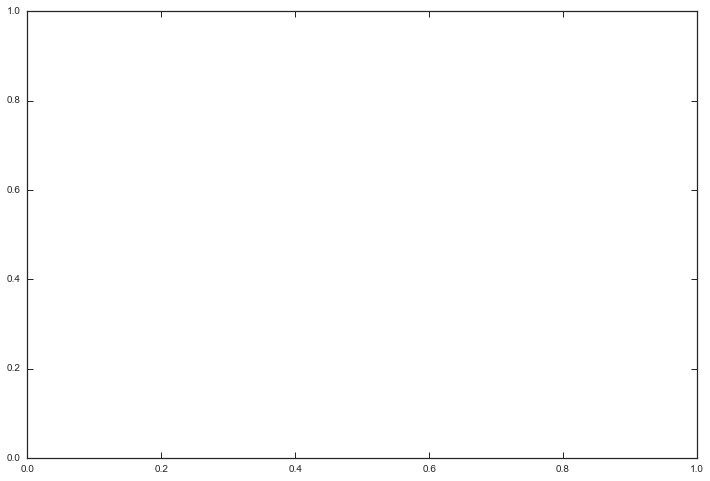

In [68]:
%matplotlib inline

plt.figure(figsize=[12,8])
currentAxis = plt.gca()

####gallazzi points
plt.plot(cv1x,cv1y,'--',zorder=1,color='k',alpha=.3,markersize=4)#, label='SDSS')
# sdss=plt.axhline(y=5,linestyle='--',color='k',alpha=.5)
plt.plot(cvx,cvy,zorder=2,color='k',alpha=.3,ms=4)#, label='Gallazzi+14 best fit line')
# galbf=plt.axhline(y=5,color='k',alpha=.5)
plt.plot(logm,gmetal,'o',zorder=3,color='k',alpha=.3,markersize=4)#,label='Gallazzi+14,z=0.7')

#####single galaxy points
plt.errorbar(gids.lmass_lz,np.log10(param_table['m_mean'][gids.IDlz]/0.019),
             yerr=np.log10([(param_table['m_mean']/(param_table['m_mean']-param_table['l_1sig_m']))[gids.IDlz],
                            (param_table['h_1sig_m']/param_table['m_mean']+1)[gids.IDlz]])
             ,color='#0D94D5',alpha=.4,ms=5,fmt='o')
plt.errorbar(gids.lmass_mz,np.log10(param_table['m_mean'][gids.IDmz]/0.019),
             yerr=np.log10([(param_table['m_mean']/(param_table['m_mean']-param_table['l_1sig_m']))[gids.IDmz],
                            (param_table['h_1sig_m']/param_table['m_mean']+1)[gids.IDmz]])
             ,color='#B18F3A',alpha=.4,ms=5,fmt='D')
plt.errorbar(gids.lmass_hz,np.log10(param_table['m_mean'][gids.IDhz]/0.019),
             yerr=np.log10([(param_table['m_mean']/(param_table['m_mean']-param_table['l_1sig_m']))[gids.IDhz],
                            (param_table['h_1sig_m']/param_table['m_mean']+1)[gids.IDhz]])
             ,color='#AB3843',alpha=.4,ms=5,fmt='s')
plt.errorbar(np.mean(gids.lmass_lz),np.log10(lz_params.mmean/0.019),
             yerr=np.log10([[lz_params.mmean/(lz_params.mmean-lz_params.mle)],[lz_params.mhe/lz_params.mmean+1]]),
             color='#0D94D5',ms=8,fmt='o',label='Mg+Hb')
plt.errorbar(np.mean(gids.lmass_mz),np.log10(mz_params.mmean/0.019),
             yerr=np.log10([[mz_params.mmean/(mz_params.mmean-mz_params.mle)],[mz_params.mhe/mz_params.mmean+1]]),
             color='#B18F3A',ms=8,fmt='D',label='Hb')
plt.errorbar(np.mean(gids.lmass_hz),np.log10(hz_params.mmean/0.019),
             yerr=np.log10([[hz_params.mmean/(hz_params.mmean-hz_params.mle)],[hz_params.mhe/hz_params.mmean+1]]),
             color='#AB3843',ms=8,fmt='s',label='No Mg/Hb')

plt.xlabel('log(M/M$_\odot$)',size=20)
plt.ylabel('log(Z/Z$_\odot$)',size=20)
plt.axis([10,11.8,-1.5,.5])
plt.tick_params(axis='both', which='major', labelsize=17)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
plt.legend(loc=4,fontsize=15)
plt.show()
# plt.savefig('../important_plots/metalmass_featgroup.png')
plt.close()

#3 Stack best fits, Feat group

In [27]:
"""DATA"""
lzS=Stack(gids.speclist_lz,gids.rshift_lz,np.arange(3250,5350,10))
lzS.Stack_normwmean()
lzS.Highest_likelihood_model_mlist(gids.ids_lz,0.021,4.0,tau)
lzS.Stack_normwmean_model(lzS.mlist)

l_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in gids.ids_lz]
l_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in gids.ids_lz]

lz_params=Combine_1D_parameters(l_cont_list,l_feat_list,gids.speclist_lz,gids.rshift_lz,tau,metal,age)
lz_params.Get_age()
lz_params.Get_metallicity()

[0.021, 4.0, 8.78]


In [89]:
"""PLOT"""
def Plot_stack(wv,fl,er,mwv,mfl,bfm,bfa,adist,mdist,window=[],save_plot=False,plot_name=''):
    fig = plt.figure(figsize=[15,8])
    plt.errorbar(wv,fl * 1000,er * 1000,color='#2e4473',fmt='o')
    plt.plot(mwv,mfl * 1000,color='#81161B',label='Z=%s Z$_\odot$,t=%s' % (np.round(bfm/0.019,2),bfa))
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvline(4862.68,linestyle='--', alpha=.3)
    plt.axvline(5176.7,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    plt.axvspan(5120, 5240, color='k', alpha=.1)
    plt.text(3900,window[3]+.1,'Ca HK',fontsize=25)
    plt.text(4080,window[3]+.1,'H$\delta$',fontsize=25)
    plt.text(4280,window[3]+.1,'G+H$\gamma$',fontsize=25)
    plt.text(4830,window[3]+.1,'H$\\beta$',fontsize=25)
    plt.text(5160,window[3]+.1,'Mgb',fontsize=25)
    
    plt.axis(window)
    plt.ylabel('F$_\lambda$',size=30)
    plt.xlabel('Restframe Wavelength ($\AA$)',size=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=1,fontsize=20)
    plt.minorticks_on()
        
    inset_axes(fig.add_subplot(111),width="50%", height=1.0, loc=2)
    plt.plot(age,adist)
    plt.xticks([])
    plt.yticks([])
    
    inset_axes(fig.add_subplot(111),width="50%", height=1.0, loc=4)
    plt.plot(metal,mdist)
    plt.xticks([])
    plt.yticks([])
    
    if save_plot == True:
        plt.savefig(plot_name)
    else:
        plt.show()
    plt.close()
    
def Plot_stack2(wv,fl,er,mwv,mfl,bfm,bfa,adist,mdist,window=[],save_plot=False,plot_name=''):
    gs = gridspec.GridSpec(2,2,height_ratios=[1,3],wspace=0)
    plt.figure(figsize=[15,8])
    plt.subplot(gs[1,:])
    plt.errorbar(wv,fl * 1000,er * 1000,color='#2e4473',fmt='o')
    plt.plot(mwv,mfl * 1000,color='#81161B',label='Z=%s Z$_\odot$,t=%s' % (np.round(bfm/0.019,2),bfa))
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvline(4862.68,linestyle='--', alpha=.3)
    plt.axvline(5176.7,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    plt.axvspan(5120, 5240, color='k', alpha=.1)
    plt.text(3900,window[3]+.1,'Ca HK',fontsize=25)
    plt.text(4080,window[3]+.1,'H$\delta$',fontsize=25)
    plt.text(4280,window[3]+.1,'G+H$\gamma$',fontsize=25)
    plt.text(4830,window[3]+.1,'H$\\beta$',fontsize=25)
    plt.text(5160,window[3]+.1,'Mgb',fontsize=25)
    plt.axis(window)
    plt.ylabel('F$_\lambda$',size=30)
    plt.xlabel('Restframe Wavelength ($\AA$)',size=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=4,fontsize=20)
    plt.minorticks_on()
        
    ax1 = plt.subplot(gs[0,0])
    plt.plot(age,adist)
    plt.yticks([])
    ax1.xaxis.tick_top()
    
    ax2 = plt.subplot(gs[0,1])
    plt.plot(metal,mdist)
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.yticks([])
    ax2.xaxis.tick_top()
    
    if save_plot == True:
        plt.savefig(plot_name)
    else:
        plt.show()
    plt.close()

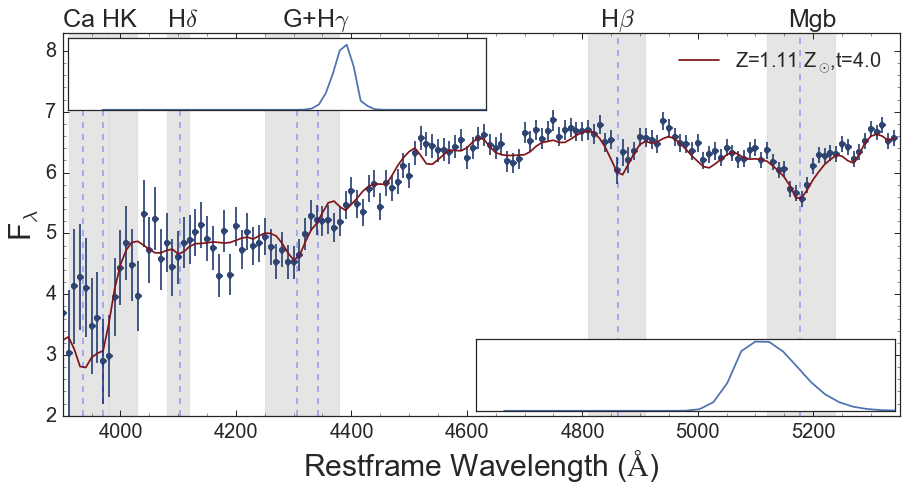

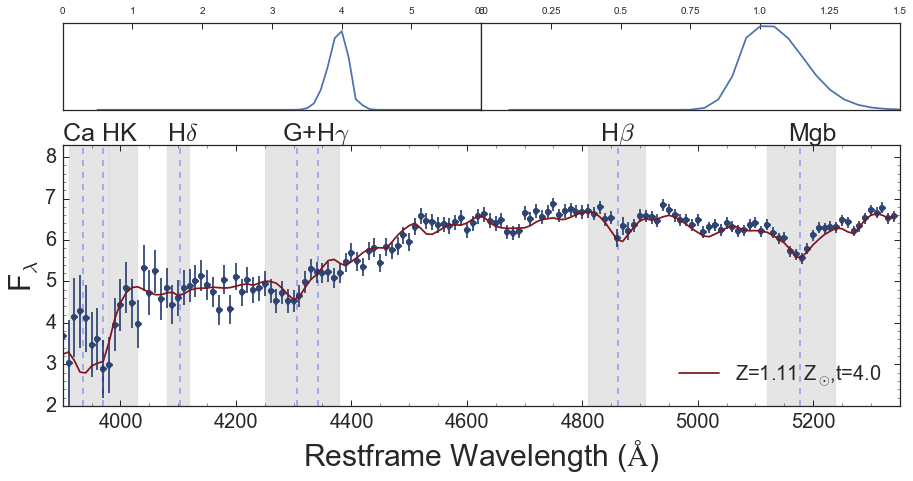

In [90]:
%matplotlib inline

Plot_stack(lzS.wv,lzS.fl,lzS.er,lzS.mwv,lzS.mfl,0.021,4.0,lz_params.a_dist,lz_params.m_dist,
           window=[3900,5350,2,8.3],save_plot=False,plot_name='../important_plots/stack_lz_bf.png')

Plot_stack2(lzS.wv,lzS.fl,lzS.er,lzS.mwv,lzS.mfl,0.021,4.0,lz_params.a_dist,lz_params.m_dist,
           window=[3900,5350,2,8.3],save_plot=False,plot_name='../important_plots/stack_lz_bf.png')

#Fitting Technique Compare

In [2]:
"""DATA"""
mlist,alist = np.load('../mcerr/simgal_m0.015_a3.0_z1.1_mcerr.npy')
ncmlist,ncalist = np.load('../mcerr/simgal_m0.015_a3.0_z1.1_nc_mcerr.npy')
tmlist,talist = np.load('../mcerr/simgal_m0.015_a3.0_z1.1_t_mcerr.npy')

In [11]:
"""PLOT"""
%matplotlib inline

plt.figure(figsize=[10,8])
plt.axvline(0.015/.019,color='k',alpha=.4,linestyle='-.',label = 'True value')
sea.distplot(mlist/.019,label='double fitting')
sea.distplot(ncmlist/.019,label='no continuum')
sea.distplot(tmlist/.019,label='with continuum')
plt.xlim(0,1.5)
plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 30)
plt.ylabel('P(Z)',fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.gcf().subplots_adjust(bottom=0.235)
plt.legend(loc=1,fontsize=23)
plt.minorticks_on()
# plt.show()
plt.savefig('../plots/P-z_3cases.png')
plt.close()

plt.figure(figsize=[10,8])
plt.axvline(3.0,color='k',alpha=.4,linestyle='-.',label = 'True value')
sea.distplot(alist,label='double fitting')
sea.distplot(ncalist,label='no continuum')
sea.distplot(talist,label='with continuum')
plt.xlim(0,6)
plt.xlabel('Age (Gyr)',fontsize = 30)
plt.ylabel('P(t)',fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.gcf().subplots_adjust(bottom=0.235)
plt.legend(loc=2,fontsize=23)
plt.minorticks_on()
# plt.show()
plt.savefig('../plots/P-t_3cases.png')
plt.close()

#Fitting Technique Compare - Likelihoods

In [10]:
"""PLOTS""" # same data as above
# %maplotlib inline
colmap = sea.cubehelix_palette(12, start=3, rot=0.5, dark=0.1, light=.5, as_cmap=True)

Mlist =np.array([mlist,ncmlist,tmlist])
Alist = np.array([alist,ncalist,talist])
pltnames = ['used_LH.png','nc_LH.png','t_LH.png']

for i in range(len(Mlist)):
    plt.figure(figsize=[10,8])
    plt.plot(Mlist[i]/.019,Alist[i],'o',alpha=.3,ms=4)
    sea.kdeplot(Mlist[i]/.019,Alist[i],n_levels=3,cmap=colmap)
    plt.plot(0.015/.019,3.0,'rp',label='Given parameters')
    plt.axis([0.0/.019,.03/.019,0,6])
    plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 30)
    plt.ylabel('Age (Gyr)',fontsize = 30)
    # plt.title('Continuum',fontsize = 20)
    plt.tick_params(axis='both', which='major', labelsize=23)
    plt.legend(loc=4,fontsize=23)
    plt.minorticks_on()
    # plt.show()
    plt.savefig('../plots/' + pltnames[i])
    plt.close()

In [18]:
%matplotlib inline

Pr,hexa,hexm=Analyze_Stack_avgage('chidat/gt10.93_jan17_3250-5350_fit_chidata.fits', np.array(tau),metal,age)
mh=[np.trapz(U,age) for U in Pr.T]
hel,heh= Error(mh,metal)
print hel,heh
print hel/0.019,heh/0.019
print np.trapz(np.multiply(mh,metal),metal)/0.019


Pr,lexa,lexm=Analyze_Stack_avgage('chidat/lt10.93_jan17_3250-5350_fit_chidata.fits', np.array(tau),metal,age)
ml=[np.trapz(U,age) for U in Pr.T]
lel, leh=Error(ml,metal)
print lel,leh
print lel/0.019,leh/0.019
print np.trapz(np.multiply(mh,metal),metal)/0.019

print min(lmass[IDL]),max(lmass[IDL])
print min(lmass[IDH]),max(lmass[IDH])

logm,gmetal=Readfile('Gallazzi_12.dat',0)
cvx,cvy=Readfile('Gallazzi_12_line.dat',0)
cv1x,cv1y=Readfile('gallazzi_points_curve1.dat',0)

glist,sgm,sgler,sgher,sgmass=Readfile('sg_fit_metals.dat',is_float=False)
sgm,sgler,sgher,sgmass=np.array([sgm,sgler,sgher,sgmass]).astype(float)

IOError: [Errno 2] No such file or directory: 'chidat/gt10.93_jan17_3250-5350_fit_chidata.fits'

In [ ]:
plt.figure(figsize=[8,8])
currentAxis = plt.gca()
##<10.9
lm=plt.errorbar(10.5,np.log10(lexm/.019),xerr=[[.415],[.415]],yerr=np.abs([[np.log10(lexm/lel)],
    [np.log10(lexm/leh)]]),zorder=5,color='#124FD2',ms=1,label='log($M_*/M_\odot$)<10.87')

###>10.9
hm=plt.errorbar(11.075,np.log10(hexm/.019),xerr=[[.135],[.135]],yerr=np.abs([[np.log10(hexm/hel)],
    [np.log10(hexm/heh)]]),zorder=5,color='#E40081',ms=1,label='log($M_*/M_\odot$)>10.87')

####gallazzi points
plt.plot(cv1x,cv1y,'--',zorder=1,color='k',alpha=.5, label='SDSS')
sdss=plt.axhline(y=5,linestyle='--',color='k',alpha=.5)
plt.plot(cvx,cvy,zorder=2,color='k',alpha=.5, label='Gallazzi+14 best fit line')
galbf=plt.axhline(y=5,color='k',alpha=.5)
gal=plt.scatter(logm,gmetal,zorder=3,color=sea.color_palette('muted')[4],label='Gallazzi+14,z=0.7')

#####single galaxy points
sg=plt.errorbar(sgmass,np.log10(sgm/0.019),yerr=np.abs([np.log10(sgm/sgler),np.log10(sgm/sgher)]),
                color='#31EA00', fmt='s', ms=5)

plt.legend([lm,hm,sg,gal,galbf,sdss],['log($M_*/M_\odot$)<10.87','log($M_*/M_\odot$)>10.87', 'Individual CLEAR galaxies',
                                    'Gallazzi+14,z=0.7','Gallazzi+14 best fit line','SDSS'],loc=3,fontsize=15)
plt.xlabel('log(M/M$_\odot$)',size=20)
plt.ylabel('log(Z/Z$_\odot$)',size=20)
plt.axis([10,11.8,-1.5,.5])
plt.tick_params(axis='both', which='major', labelsize=17)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
# plt.show()
plt.savefig('../important_plots/massvmetal_1-18.png')
plt.close()

In [ ]:
Pr,exa,exm=Analyze_Stack_avgage('chidat/gt10.93_feb23_fit_chidata.fits', np.array(tau),metal,age)
# onesig,twosig=Likelihood_contours(age,metal,Pr)
# levels=np.array([twosig,onesig])
# print levels

a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019

gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

levels=np.array([22.90946612, 274.30537752])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=cmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(exm/0.019,exa,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)>10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (exa,np.round(exm/0.019,2)))
plt.legend(loc=3,fontsize=17)
# plt.xticks([0.0095, 0.01425, 0.019, 0.2375, 0.285],
#            np.round(np.array([0.0095, 0.01425, 0.019, 0.2375, 0.285])/0.019, 2))

# plt.xticks([0.0095, 0.01425, 0.019, 0.2375, 0.285],
#            [.5,.75,1.0,1.25,1.5])
plt.minorticks_on()
plt.xlim(.5,1.5)
plt.ylim(1,4.4)
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(1,4.4)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(.5,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
# plt.show()
plt.savefig('../important_plots/gt10-93_LH_2-23.png')
plt.close()

####
#Lowmass
####
# 
Pr,exa,exm=Analyze_Stack_avgage('chidat/lt10.93_feb23_fit_chidata.fits', np.array(tau),metal,age)
# onesig,twosig=Likelihood_contours(age,metal,Pr)
# levels=np.array([twosig,onesig])
# print levels

a=[np.trapz(U,metal) for U in Pr]
m=np.array([np.trapz(U,age) for U in Pr.T])/0.019

gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

levels=np.array([ 23.75864788, 116.41737463])

plt.figure(figsize=[8,8])
gs.update(wspace=0.0,hspace=0.0)
ax=plt.subplot(gs[1,0])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=cmap)
plt.xlabel('Z/Z$_\odot$',size=20)
plt.ylabel('Average Age (Gyrs)',size=20)
plt.plot(exm/0.019,exa,'d',color='#81161B',ms=6,
            label='log($M_*/M_\odot$)<10.93\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' %
                  (exa,np.round(exm/0.019,2)))
plt.legend(loc=2,fontsize=17)
# plt.xticks([0,0.00475,0.0095,0.01425,.019,0.2375,0.285]
#            ,np.round(np.array([0,0.00475,0.0095,0.01425,.019,0.2375,0.285])/0.019,2))
plt.minorticks_on()
plt.xlim(.5,1.5)
plt.ylim(1,4.4)
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(gs[1,1])
plt.plot(a,age)
plt.ylim(1,4.4)
plt.yticks([])
plt.xticks([])
#
plt.subplot(gs[0,0])
plt.plot(metal/0.019,m)
plt.xlim(.5,1.5)
plt.yticks([])
plt.xticks([])
plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
# plt.show()
plt.savefig('../important_plots/lt10-93_LH_2-23.png')
plt.close()

In [ ]:
Pr,hexa,hexm=Analyze_Stack_avgage('chidat/gt10.93_jan17_3250-5350_fit_chidata.fits', np.array(tau),metal,age)
ah=[np.trapz(U,metal) for U in Pr]
hel,heh= Error(ah,age)
print hel,heh
print np.trapz(np.multiply(ah,age),age)

Pr,lexa,lexm=Analyze_Stack_avgage('chidat/lt10.93_jan17_3250-5350_fit_chidata.fits', np.array(tau),metal,age)
al=[np.trapz(U,metal) for U in Pr]
lel, leh=Error(al,age)
print lel,leh
print np.trapz(np.multiply(al,age),age)


print min(rshift[IDL]),max(rshift[IDL]), np.mean(rshift[IDL])
print min(rshift[IDH]),max(rshift[IDH]), np.mean(rshift[IDH])

fumx,fumy=Readfile('fumagalli_fig14.dat',0)
d,fverr=Readfile('fumagalli_fig14_verr.dat',0)
fherr,d=Readfile('fumagalli_fig14_herr.dat',0)
z=np.linspace(0,2,100)
ages=[Oldest_galaxy(a) for a in z]

verr=np.zeros(len(fverr))
herr=np.zeros(len(fherr))
for i in range(len(verr)):
    verr[i]=np.abs(fverr[i]-fumy[i])
    herr[i]=np.abs(fherr[i]-fumx[i])
    
glist,sga,sgaler,sgaher,sgrshift=Readfile('sg_fit_ages.dat',is_float=False)
sga,sgaler,sgaher,sgrshift=np.array([sga,sgaler,sgaher,sgrshift]).astype(float)

In [ ]:
%matplotlib inline

plt.figure(figsize=[12,8])
currentAxis = plt.gca()

plt.plot(z,ages,'k--',alpha=.5)
# #########fsps
# ####ls10.87
# lme=plt.errorbar(1.3215,lexa,xerr=.015,yerr=[[lexa-lel],[leh-lexa]]
#              ,color='w',zorder=5,fmt='s',ms=.1,label='log($M_*/M_\odot$)<10.93')

lme=plt.scatter(1.3215,lexa,
             color='w',zorder=5,marker='s',label='log($M_*/M_\odot$)<10.93')

lm=currentAxis.add_patch(Rectangle((min(rshift[IDL]),lel),max(rshift[IDL])-min(rshift[IDL]),leh-lel
                                ,color='#124FD2',zorder=4,alpha=1))
####gt10.87
# hme=plt.errorbar(1.32,hexa,xerr=.015,yerr=[[hexa-hel],[heh-hexa]]
#              ,color='w',zorder=5,fmt='s',ms=.1,label='log($M_*/M_\odot$)>10.93')

hme=plt.scatter(1.32,hexa,color='w',zorder=5,marker='s',
                label='log($M_*/M_\odot$)>10.93')

hm=currentAxis.add_patch(Rectangle((min(rshift[IDH]),hel),max(rshift[IDH])-min(rshift[IDH]),heh-hel
                                ,color='#E40081',zorder=4,alpha=1))
##########other point
fumbc=plt.errorbar(fumx[0:3],fumy[0:3],xerr=herr[0:3],yerr=verr[0:3]
             ,color='#8E9AB3',zorder=1,fmt='o',alpha=1,ms=1)#,label='Fumagalli+16 BC03')
fumfs=plt.errorbar(fumx[3:6],fumy[3:6],xerr=herr[3:6],yerr=verr[3:6]
             ,color='#DDF0B8',zorder=1,fmt='o',alpha=1,ms=1)#,label='Fumagalli+16 FSPS10')
fumck=plt.errorbar(fumx[6:9],fumy[6:9],xerr=herr[6:9],yerr=verr[6:9]
             ,color='#FFEBC4',zorder=1,fmt='o',alpha=1,ms=1)#,label='Fumagalli+16 FSPSC3K')
men=plt.scatter(fumx[9],fumy[9],color='k',marker='^',zorder=2)#,label='Mendel+15')
choi=plt.scatter(fumx[10:14],fumy[10:14],color='k',marker='p',zorder=2)#,label='Choi+14')
gal=plt.scatter(fumx[14],fumy[14],color='k',marker='d',zorder=2)#,label='Gallazzi+14')
whit=plt.scatter(fumx[15],fumy[15],color='k',marker='*',zorder=2)#,label='Whitaker+13')
plt.axis([0,2,0,8])

####single galaxy
# sgavr=plt.errorbar(sgrshift,sga,yerr=[np.abs(sga-sgaler),np.abs(sga-sgaher)], color='#31EA00',
#              alpha=1, zorder=6,fmt='s', ms=5)


l1=plt.legend([men,choi,gal,whit,fumbc,fumfs,fumck],['Mendel+15','Choi+14','Gallazzi+14','Whitaker+13',
                                                     'Fumagalli+16 BC03','Fumagalli+16 FSPS10','Fumagalli+16 FSPSC3K'],
                                                        loc=3,fontsize=10)
# plt.legend([(lm,lme),(hm,hme),sgavr],['log($M_*/M_\odot$)<10.87','log($M_*/M_\odot$)>10.87','Individual CLEAR galaxies'],
#                                                         loc=1,fontsize=14)

plt.legend([(lm,lme),(hm,hme)],['log($M_*/M_\odot$)<10.87','log($M_*/M_\odot$)>10.87'],
                                                        loc=1,fontsize=14)

plt.gca().add_artist(l1)
plt.xlabel('Redshift',size=20)
plt.ylabel('Age (Gyrs)',size=20)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.minorticks_on()
plt.text(1,6.35,'Age of the Universe',rotation=-29,fontsize=12)
plt.gcf().subplots_adjust(bottom=0.16)
# plt.show()
# plt.savefig('../important_plots/agevred_1-18.png')
plt.savefig('../important_plots/agevred_nosg_1-19.png')
plt.close()

In [ ]:
dat=fits.open('../../../Clear_data/extractions_nov_22/GS3/GS3-G102_40597.2D.fits')
wv,fl,er=np.array(Readfile('spec_stacks_nov29/s40597_stack.dat'))

sens=dat[10].data
wave=dat[9].data
isens=interp1d(wave,sens)
newsens=isens(wv)
newsens/=max(newsens)

cmap = sea.cubehelix_palette(12, start=2, rot=.5, dark=0, light=1.1, as_cmap=True)
gs=gridspec.GridSpec(2,1,height_ratios=[1,5],hspace=0)
########
plt.figure(figsize=(15,5))
plt.subplot(gs[0])
plt.imshow(dat[5].data-dat[8].data,cmap=cmap, aspect='auto')
plt.xticks([],[])
plt.yticks([],[])
##########
plt.subplot(gs[1])
plt.errorbar(wv,newsens*fl/1E-18,newsens*er/1E-18,color='#465885',ecolor='#a4699f',
             fmt='o',ms=3,label='GS3-G102_40597\nz=1.22')
plt.axvspan(3910*2.22, 3979*2.22, color='k', alpha=.1,zorder=0)
plt.axvspan(3981*2.22, 4030*2.22, color='k', alpha=.1,zorder=0)
plt.axvspan(4082*2.22, 4122*2.22, color='k', alpha=.1,zorder=0)
plt.axvspan(4250*2.22, 4400*2.22, color='k', alpha=.1,zorder=0)
plt.axvspan(4830*2.22, 4930*2.22, color='k', alpha=.1,zorder=0)
plt.axvspan(5109*2.22, 5250*2.22, color='k', alpha=.1,zorder=0)
plt.text(3890*2.22,2.25,'Ca HK',fontsize=18)
plt.text(4080*2.22,2.25,'H$\delta$',fontsize=18)
plt.text(4275*2.22,2.25,'H$\gamma$+G',fontsize=18)
plt.text(4860*2.22,2.25,'H$\\beta$',fontsize=18)
plt.text(5160*2.22,2.25,'Mg',fontsize=18)
plt.ylim(0,3.5)
plt.xlim(wave[0],wave[-1])
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc=2,fontsize=15)
plt.xlabel('Wavelength ($\AA$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.2 )
plt.minorticks_on()
plt.show()
# plt.savefig('../important_plots/1d2dspec_40597_1-18.png')
plt.close()

######################

dat=fits.open('../../../Clear_data/extractions_nov_22/ERSPRIME/ERSPRIME-G102_39170.2D.fits')
wv,fl,er=np.array(Readfile('spec_stacks_nov29/s39170_stack.dat'))

sens=dat[10].data
wave=dat[9].data
isens=interp1d(wave,sens)
newsens=isens(wv)
newsens/=max(newsens)

cmap = sea.cubehelix_palette(12, start=2, rot=.5, dark=0, light=1.1, as_cmap=True)
gs=gridspec.GridSpec(2,1,height_ratios=[1,5],hspace=0)
########
plt.figure(figsize=(15,5))
plt.subplot(gs[0])
plt.imshow(dat[5].data-dat[8].data,cmap=cmap, aspect='auto')
plt.xticks([],[])
plt.yticks([],[])
##########
plt.subplot(gs[1])
plt.errorbar(wv,newsens*fl/1E-18,newsens*er/1E-18,color='#465885',ecolor='#a4699f',
             fmt='o',ms=3,label='ERSPRIME-G102_39170\nz=1.022')
plt.axvspan(3910*2.022, 3979*2.022, color='k', alpha=.1,zorder=0)
plt.axvspan(3981*2.022, 4030*2.022, color='k', alpha=.1,zorder=0)
plt.axvspan(4082*2.022, 4122*2.022, color='k', alpha=.1,zorder=0)
plt.axvspan(4250*2.022, 4400*2.022, color='k', alpha=.1,zorder=0)
plt.axvspan(4830*2.022, 4930*2.022, color='k', alpha=.1,zorder=0)
plt.axvspan(5109*2.022, 5250*2.022, color='k', alpha=.1,zorder=0)
plt.text(3890*2.022,2.25,'Ca HK',fontsize=18)
plt.text(4080*2.022,2.25,'H$\delta$',fontsize=18)
plt.text(4270*2.022,2.25,'H$\gamma$+G',fontsize=18)
plt.text(4850*2.022,2.25,'H$\\beta$',fontsize=18)
plt.text(5160*2.022,2.25,'Mg',fontsize=18)
plt.ylim(0,5.2)
plt.xlim(wave[0],wave[-1])
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc=2,fontsize=15)
plt.xlabel('Wavelength ($\AA$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.2)
plt.minorticks_on()
plt.show()
# plt.savefig('../important_plots/1d2dspec_39170_1-18.png')
plt.close()

In [ ]:
plt.figure(figsize=[8,8])
plt.hist(lmass[IDA],12)
plt.axvline(10.93,color='k',alpha=.5,linestyle='--')
plt.xlabel('log(M/M$_\odot$)',size=20)
plt.ylabel('N',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.18)
# plt.show()
plt.savefig('../important_plots/mass_hist_1-18.png')
plt.close()
 
plt.figure(figsize=[8,8])
plt.hist(rshift[IDA],12)
plt.xlabel('Redshift',size=20)
plt.ylabel('N',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.18)
# plt.show()
plt.savefig('../important_plots/redshift_hist_1-18.png')
plt.close()

In [ ]:
%matplotlib inline

mclist=glob('mcerr/mcom*')

def Get_repeats(x,y):
    z=[x,y]
    tz=np.transpose(z)
    size=np.zeros(len(tz))
    for i in range(len(size)):
        size[i]=len(np.argwhere(tz==tz[i]))/2
    size/=5
    return size

def Get_entry_size(param):
    plist = np.unique(param)
    size=np.zeros(len(plist))
    for i in range(len(plist)):
        size[i]=len(param[param == plist[i]])
    return plist,size

def Get_merr_1sig(uni,size):
    psum=[]
    for i in range(len(size)):
        psum.append(size[i])
        if sum(psum) >= 160:
            break
        
    psum2=[]
    for i in range(len(size)):
        psum2.append(size[::-1][i])
        if sum(psum2) >= 160:
            break
    return uni[len(psum)-1],uni[-(len(psum2)-1)]
        
params=[[0.0085,2.0],[0.0132,4.3],[0.019,3.1],[0.024,3.5],[0.0085,2.0],[0.0132,4.3],[0.019,3.1],[0.024,3.5]]
fn=['c','c','c','c','nc','nc','nc','nc']
location=[1,4,3,3,4,4,3,3]
for i in range(len(mclist)):
    
    # print mclist[i]
    merr,aerr=Readfile(mclist[i])
    s = Get_repeats(merr, aerr)
    muni, msize = Get_entry_size(merr)
    auni, asize = Get_entry_size(aerr)
    lm,hm = Get_merr_1sig(muni,msize)
    la,ha = Get_merr_1sig(auni,asize)

    gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])

    plt.figure(figsize=[8,8])
    gs.update(wspace=0.0,hspace=0.0)
    ax=plt.subplot(gs[1,0])
    plt.scatter(merr, aerr, s=s,label='MC points')
    plt.plot(params[i][0],params[i][1], 'rd',label='Model')
    # plt.axvline(muni[np.argmax(msize)],color='#f6a300',linestyle='-.',label='Mode')
    plt.plot(muni[np.argmax(msize)],auni[np.argmax(asize)],'p',color='#f6a300',label='Mode')
    plt.axvline(lm,color='k',linestyle='--',alpha=.5,label='1 $\sigma$')
    plt.axvline(hm,color='k',linestyle='--',alpha=.5)
    # plt.axhline(auni[np.argmax(asize)],color='r',linestyle='-.')
    plt.axhline(la,color='k',linestyle='--',alpha=.5)
    plt.axhline(ha,color='k',linestyle='--',alpha=.5)
    plt.ylim(0,6)
    plt.xlim(0,0.03)
    plt.xticks([0.00475,0.0095, 0.01425, 0.019, 0.02375, 0.0285],
           np.round(np.array([0.00475,0.0095, 0.01425, 0.019, 0.02375, 0.0285])/0.019, 2))
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.xlabel('Z/Z$_\odot$',size=20)
    plt.ylabel('Average Age (Gyrs)',size=20)
    plt.legend(loc=location[i],fontsize=15)


    plt.subplot(gs[1,1])
    plt.hist(aerr,50,orientation='horizontal')
    # plt.axhline(auni[np.argmax(asize)],color='r',linestyle='-.')
    plt.axhline(la,color='k',linestyle='--',alpha=.5)
    plt.axhline(ha,color='k',linestyle='--',alpha=.5)
    plt.ylim(0,6)
    plt.yticks([])
    plt.xticks([])

    plt.subplot(gs[0,0])
    plt.hist(merr,25)
    # plt.axvline(muni[np.argmax(msize)],color='r',linestyle='-.')
    plt.axvline(lm,color='k',linestyle='--',alpha=.5)
    plt.axvline(hm,color='k',linestyle='--',alpha=.5)
    plt.xlim(0,.03)
    plt.yticks([])
    plt.xticks([])
    plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
    # plt.show()
    plt.savefig('../mcerr_plots/mcerr_dist_%s_%s_%s.png' % (fn[i],params[i][0],params[i][1]))
    plt.close()

In [16]:
%matplotlib inline

img1=fits.open('../../../Clear_data/extractions_nov_22/ERSPRIME/ERSPRIME-19-122-G102_39170.2D.fits')
img2=fits.open('../../../Clear_data/extractions_nov_22/ERSPRIME/ERSPRIME-21-092-G102_39170.2D.fits')
img3=fits.open('../../../Clear_data/extractions_nov_22/ERSPRIME/ERSPRIME-22-142-G102_39170.2D.fits')

print img1.info()

Filename: ../../../Clear_data/extractions_nov_22/ERSPRIME/ERSPRIME-19-122-G102_39170.2D.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      36   ()              
1    DSCI        ImageHDU        51   (36, 36)     float64   
2    DINTER      ImageHDU        51   (36, 36)     float64   
3    DWHT        ImageHDU        51   (36, 36)     float32   
4    DSEG        ImageHDU        51   (36, 36)     int32   
5    SCI         ImageHDU        52   (360, 36)    float64   
6    WHT         ImageHDU        53   (360, 36)    float64   
7    MODEL       ImageHDU        53   (360, 36)    float64   
8    CONTAM      ImageHDU        53   (360, 36)    float64   
9    WAVE        ImageHDU        52   (360,)       float64   
10   SENS        ImageHDU        53   (360,)       float64   
11   YTRACE      ImageHDU        53   (360,)       float64   


None


In [3]:
field = fits.open('../../Grizlsim/s39170_cmb_flt.fits')

In [4]:
field.info()

Filename: ../../Grizlsim/s39170_cmb_flt.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     282   ()              
1    SCI         ImageHDU        58   (1614, 1614)   float32   
2    ERR         ImageHDU        58   (1614, 1614)   float32   
3    DQ          ImageHDU        58   (1614, 1614)   int64   


In [67]:
%matplotlib inline

gs = gridspec.GridSpec(1,2,width_ratios=[1,7.5],wspace=0)

plt.figure(figsize=[12,4])
# plt.subplot(gs[0])
# plt.imshow(img1['DSCI'].data[::-1])
# plt.yticks([])
# plt.xticks([])
# 
# plt.subplot(gs[1])
plt.imshow((img1['SCI'].data)[::-1,60:330])
plt.yticks([])
plt.xticks([])
plt.savefig('../plots/s39170_p1.png')
# plt.show()
plt.close()

plt.figure(figsize=[12,4])
# plt.subplot(gs[0])
# plt.imshow(img2['DSCI'].data[::-1])
# plt.yticks([])
# plt.xticks([])
# 
# plt.subplot(gs[1])
plt.imshow((img2['SCI'].data)[::-1,60:330])
plt.yticks([])
plt.xticks([])
plt.savefig('../plots/s39170_p2.png')
# plt.show()
plt.close()

plt.figure(figsize=[12,4])
# plt.subplot(gs[0])
# plt.imshow(img3['DSCI'].data[::-1])
# plt.yticks([])
# plt.xticks([])
# 
# plt.subplot(gs[1])
plt.imshow((img3['SCI'].data)[::-1,60:330])
plt.yticks([])
plt.xticks([])
plt.savefig('../plots/s39170_p3.png')
# plt.show()
plt.close()